<a href="https://colab.research.google.com/github/Elma-dev/Deep_Learning_Specialization/blob/main/Deep_Learning_Specialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Vectorization

In [ ]:
#Sum Of Column Without for loop
A=np.array([[65,0,4.4,68]
         ,[1.2,104,52,8]
         ,[1.8,135,99,0.9]])

ones=np.ones((1,3))
np.dot(ones,A)

array([[ 68. , 239. , 155.4,  76.9]])

In [ ]:
#Vectorization Vs forLoop
A=np.random.rand(10000)
B=np.random.rand(10000)

#Vectorization
tic=time.time()
c=np.dot(A,B)
tac=time.time()
print(f"result={c} the operation take: {(tac-tic)*1000}ms")

#For Loop
c=0
tic=time.time()
for i in range(10000):
  c+=A[i]*B[i]
tac=time.time()
print(f"result={c} the operation take: {(tac-tic)*1000}ms")

result=2490.9727078056144 the operation take: 0.3638267517089844ms
result=2490.97270780561 the operation take: 12.353658676147461ms


# Trics

In [ ]:
#Row Vector / Column Vector / Rank 1 array

#Rank 1 array
print(f"rank_1_array:\n{np.random.randn(5)}") #-> don't use it
print(f"column_vector:\n{np.random.randn(1,5)}")
print(f"row_vector:\n{np.random.randn(5,1)}")

rank_1_array:
[ 1.57616845  1.66386509 -0.95576009  1.05843147  0.02352394]
column_vector:
[[-0.60440295 -0.01462151 -2.3902544   1.05783492 -0.74696992]]
row_vector:
[[ 0.44905297]
 [ 1.33335196]
 [-0.14648774]
 [ 0.10846736]
 [-0.23346869]]


In [ ]:
a=np.array([[2,1],[1,3]])
np.dot(a,a)

array([[ 5,  5],
       [ 5, 10]])

In [ ]:
a=np.random.randn(12288,150)
b=np.random.randn(150,45)

np.dot(a,b).shape
a.sum()

249.40261845499705

In [ ]:
a=np.random.randn(2,3)
b=np.random.randn(2,1)
a+b

array([[1.93973714, 0.42668552, 2.36734779],
       [0.62475678, 0.98298616, 1.22136655]])

#<center>**Logistic_Regression_with_a_Neural_Network_mindset**</center>

### **Load Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import scipy
import PIL

from PIL import Image
from scipy import ndimage

In [ ]:
def load_dataset():
  train_dataset=h5py.File("train_catvnoncat.h5")
  train_set_x_orig=np.array(train_dataset["train_set_x"][:])#train features
  train_set_y_orig=np.array(train_dataset["train_set_y"][:])

  test_dataset=h5py.File("test_catvnoncat.h5")
  test_set_x_orig=np.array(test_dataset["test_set_x"][:])#test features
  test_set_y_orig=np.array(test_dataset["test_set_y"][:])

  classes=np.array(test_dataset["list_classes"][:])#the list of classes

  train_set_y_orig=train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
  test_set_y_orig=test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))

  return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig


In [ ]:
#read data
train_set_in,train_set_out,test_set_in,test_set_out=load_dataset()

In [ ]:
#show the shapes of each var
print(f"shape train test {train_set_in.shape}") #==> (nbrImg,x,y,depth)
print(f"shape train test {train_set_out.shape}")
print(f"shape train test {test_set_in.shape}")
print(f"shape train test {test_set_out.shape}")

shape train test (209, 64, 64, 3)
shape train test (1, 209)
shape train test (50, 64, 64, 3)
shape train test (1, 50)


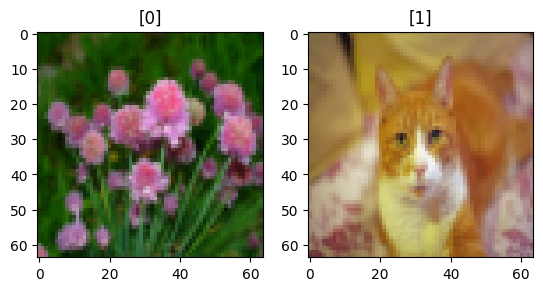

In [ ]:
f,ax=plt.subplots(1,2)
ax[0].imshow(train_set_in[21])
ax[0].title.set_text(f"{train_set_out[:,21]}")
ax[1].imshow(train_set_in[24])
ax[1].title.set_text(f"{train_set_out[:,24]}")
plt.show()

## **Image Flaten**
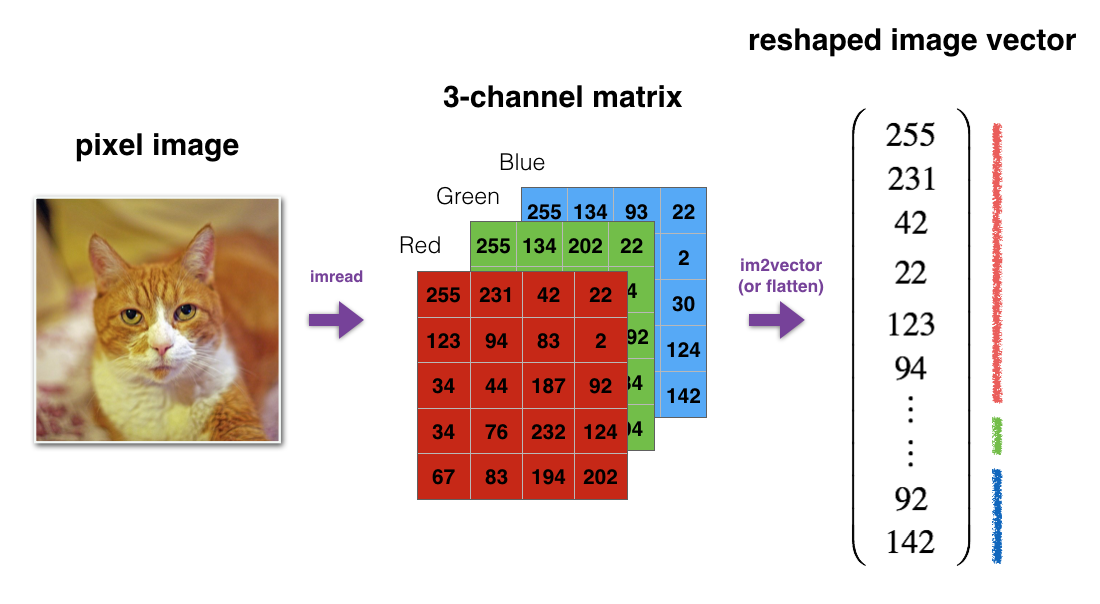

In [ ]:
#Reshape the training and test image --> flaten each image
train_img=train_set_in.reshape(train_set_in.shape[0],-1).T #==>(nbrImge,flatenEachImage) & transpose to be vect
test_img=test_set_in.reshape(test_set_in.shape[0],-1).T

<center>
<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td>
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td>
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td>
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td>
  </tr>
</table>
</center>

In [ ]:
train_img

array([[ 17, 196,  82, ..., 143,  22,   8],
       [ 31, 192,  71, ..., 155,  24,  28],
       [ 56, 190,  68, ..., 165,  23,  53],
       ...,
       [  0,  82, 138, ...,  85,   4,   0],
       [  0,  80, 141, ..., 107,   5,   0],
       [  0,  81, 142, ..., 149,   0,   0]], dtype=uint8)

##**"Standardize" the data**

In [ ]:
#standarization of image
train_img=train_img/255
test_img=test_img/255

In [ ]:
train_img

array([[0.06666667, 0.76862745, 0.32156863, ..., 0.56078431, 0.08627451,
        0.03137255],
       [0.12156863, 0.75294118, 0.27843137, ..., 0.60784314, 0.09411765,
        0.10980392],
       [0.21960784, 0.74509804, 0.26666667, ..., 0.64705882, 0.09019608,
        0.20784314],
       ...,
       [0.        , 0.32156863, 0.54117647, ..., 0.33333333, 0.01568627,
        0.        ],
       [0.        , 0.31372549, 0.55294118, ..., 0.41960784, 0.01960784,
        0.        ],
       [0.        , 0.31764706, 0.55686275, ..., 0.58431373, 0.        ,
        0.        ]])

##**General Architecture of the learning algorithm**
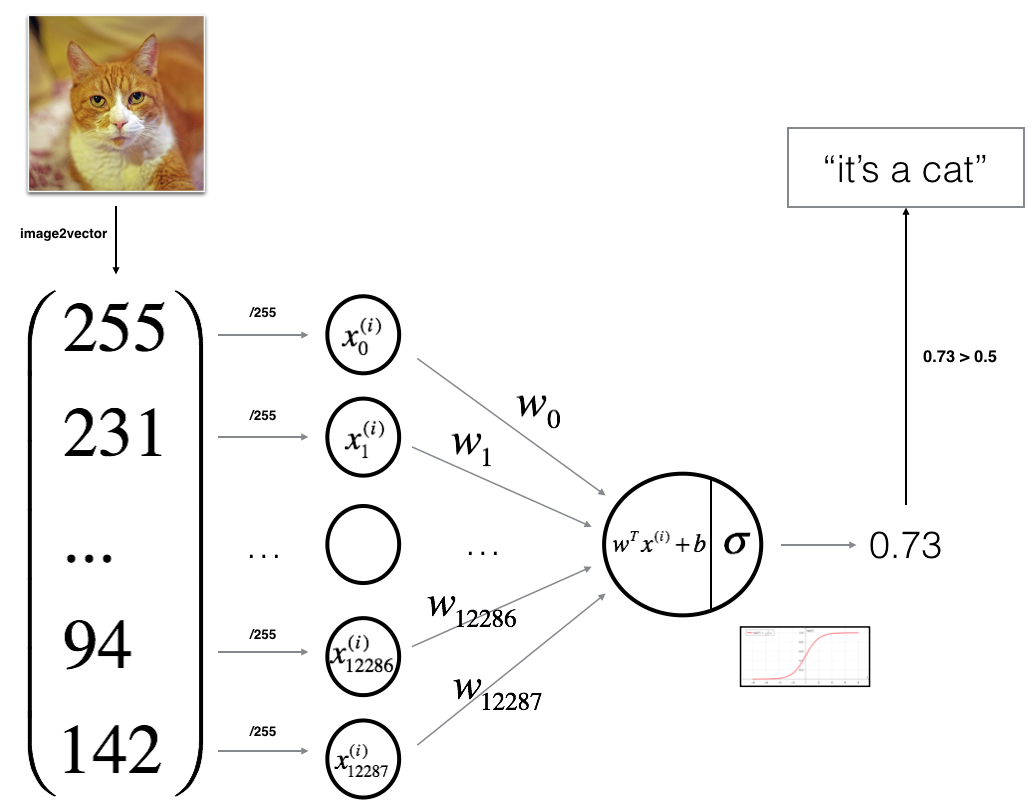

## **Sogmoid Function**
<center>
$sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$
</center>

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
#test
print(f"{sigmoid(0)}")
print(f"{sigmoid(np.array([2,3]))}")

0.5
[0.88079708 0.95257413]


##**Propagate**
<center>
$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$

* ***Cost Function***

$J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$
* ***Gradient***
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$
</center>

In [ ]:
def propagate(w,b,X,Y):
  #Calculate z
  z=np.dot(w.T,X)+b
  #Calculate A
  A=sigmoid(z)
  #Calcualte Cost Function
  m=X.shape[0]
  J= -np.sum((Y*np.log(A) + (1-Y)*np.log(1-A)))/m
  #Calculate db,dw
  dw=np.dot(X,(A-Y).T)/m
  db=np.sum(A-Y)/m
  return dw,db,J

In [ ]:
#Test
w=np.zeros((train_img.shape[0],1))
b=0.0
X=train_img
Y=train_set_out
z=np.dot(w.T,X)+b
#Explanation
print(f"w.T.shape * X.shape = z.shape ==> {w.T.shape , X.shape , z.shape}")
#Test
print(f"Propagate: {propagate(w,b,X,Y)}")

w.T.shape * X.shape = z.shape ==> ((1, 12288), (12288, 209), (1, 209))
Propagate: (array([[0.00080295],
       [0.00107151],
       [0.00083742],
       ...,
       [0.00086311],
       [0.00105667],
       [0.00055195]]), 0.0026448567708333335, 0.01178936854956287)


## **Gradient Descent**

In [ ]:
import copy
def gradientDescent(w,b,X,Y,iter=1000,alpha=0.01):
  errors=[]
  w,b=copy.deepcopy(w),copy.deepcopy(b)
  for i in range(iter):
    dw,db,cost=propagate(w,b,X,Y)
    w-=alpha*dw
    b-=alpha*db
    errors.append(cost)
  return {"w":w,"b":b,"errors":errors}


Gradient Descent: 


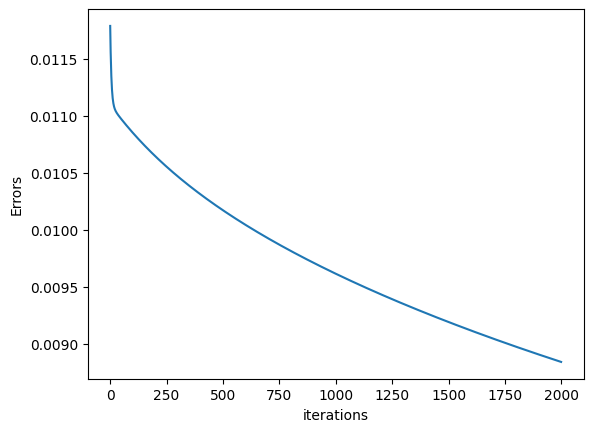

In [ ]:
#Test
w=np.zeros((train_img.shape[0],1))
b=0.0
X=train_img
Y=train_set_out
#Test
print(f"Gradient Descent: ")
results=gradientDescent(w,b,X,Y,iter=2000)
plt.plot(range(2000),results["errors"])
plt.xlabel("iterations")
plt.ylabel("Errors")
plt.show()

#**Neural Network : Hidden Layer**

In [ ]:
w=np.random.rand(4,3)
X=np.random.rand(2,3)
b=np.random.rand(1,4)
w_out=np.random.rand(1,4)
b_out=0.01

In [ ]:
print(f'shape(w)={w.shape}')
print(f'shape(X)={X.shape}')
print(f'shape(b)={b.shape}')
print(f'shape(w_out)={w_out.shape}')

shape(w)=(4, 3)
shape(X)=(2, 3)
shape(b)=(1, 4)
shape(w_out)=(1, 4)


In [ ]:
#4 neuron in hidenLayer # 3 input in each row
print(f'w={w}')
print(f'X={X}')
print(f'b={b}')
print(f'w_out={w_out}')

w=[[0.56597542 0.11281562 0.9008307 ]
 [0.75446871 0.67547955 0.85080032]
 [0.70349381 0.17954424 0.36919021]
 [0.0097813  0.95565861 0.38667627]]
X=[[0.52213635 0.8785639  0.56026433]
 [0.02986885 0.27604253 0.11822609]]
b=[[0.29038254 0.7700235  0.72751797 0.82502043]]
w_out=[[0.5670256  0.53605661 0.08971688 0.26928204]]


In [ ]:
#without vectorization
print(np.dot(w[0],X[0]))
print(np.dot(w[0],X[1]))
print('-------------------')
print(np.dot(w[1],X[0]))
print(np.dot(w[1],X[1]))
print('-------------------')
print(np.dot(w[2],X[0]))
print(np.dot(w[2],X[1]))
print('-------------------')
print(np.dot(w[3],X[0]))
print(np.dot(w[3],X[1]))
print('-------------------')
#with vect
Z=np.dot(w,X.T)+b.T   # Z[[z0i],[z1i]]
print(f'Z={Z}')
print('-------------------')
Z=Z.T # Z[[zi0],[zi1]]
print(f'Z={Z}')
print('-------------------')
#Activation function
A=1/(1+np.exp(-Z))
print(f'A={A}')
print('-------------------')
#Output Layer
Z_out=np.dot(w_out,A.T)+b_out
print(f'Z_out={Z_out}')
print('-------------------')
A_out=1/(1+np.exp(-Z_out))
print(f'A_out={A_out}')

0.8993353755181784
0.1545486370097191
-------------------
1.4640605555144663
0.3095829957417213
-------------------
0.7319048828665948
0.114222313591268
-------------------
1.0613552508256636
0.3098098040524802
-------------------
Z=[[1.18971791 0.44493117]
 [2.23408406 1.0796065 ]
 [1.45942286 0.84174029]
 [1.88637568 1.13483023]]
-------------------
Z=[[1.18971791 2.23408406 1.45942286 1.88637568]
 [0.44493117 1.0796065  0.84174029 1.13483023]]
-------------------
A=[[0.76669061 0.90326879 0.81144439 0.86834174]
 [0.6094334  0.74641951 0.69883161 0.7567292 ]]
-------------------
Z_out=[[1.2355655  1.02215803]]
-------------------
A_out=[[0.77479118 0.73539274]]


In [ ]:
A=np.random.randn(4,3)
B=np.sum(A,axis=1,keepdims=True)
B.shape

(4, 1)

## **Building Neural Network with One Hiden Layer**

In [4]:
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [5]:
X,Y=load_planar_dataset()

In [6]:
print(f'X.shape={X.shape}')
print(f'Y.shape={Y.shape}')

X.shape=(2, 400)
Y.shape=(1, 400)


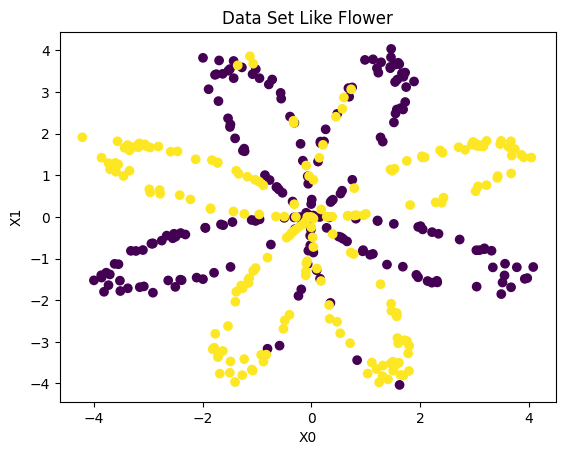

In [7]:
plt.scatter(X[0,:],X[1,:],c=Y)
plt.xlabel("X0")
plt.ylabel("X1")
plt.title("Data Set Like Flower")
plt.show()

**Trying to build a NN can classify our data set**

---



*   **Our data set has tow class (Binary Classification)**
*   **We build a NN with the next parameters:**

  *   input layer size  : 2
  *   hidden layer size : 4
  *   output layer size : 1

* **To build any NN we should to follow the next steps:**
    1. Define the neural network structure ( # of input units,  # of hidden units, etc).
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)



---




In [8]:
#1: Defin The NN Structure
def neuralNetStruct(n_i,n_h,n_o):
  return {"n_i":n_i,"n_h":n_h,"n_o":n_o}

In [9]:
#2: Initialize Model Params
def parameters(nnStruct):
  W1=np.random.randn(nnStruct["n_h"],nnStruct["n_i"])
  b1=np.zeros((nnStruct["n_h"],1))
  W2=np.random.randn(nnStruct["n_o"],nnStruct["n_h"])
  b2=np.zeros((nnStruct["n_o"],1))
  return {"W1":W1,"b1":b1,"W2":W2,"b2":b2}

In [10]:
#Test 1
parameters(neuralNetStruct(2,4,1))

{'W1': array([[ 0.81434313,  0.78046993],
        [-1.46405357, -0.15449119],
        [-0.09243232, -0.23787527],
        [-0.75566277,  1.85143789]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[ 0.20909668,  1.55501599, -0.56914865, -1.06179676]]),
 'b2': array([[0.]])}

**<center>Forward Equation</center>**

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$

In [11]:
#3: Forward Propagation
def forwardPropagation(X,parameters):
  Z1=np.dot(parameters['W1'],X)+parameters['b1']
  A1=np.tanh(Z1)
  Z2=np.dot(parameters['W2'],A1)+parameters['b2']
  A2=sigmoid(Z2)
  return {'out':A2,'cash':{'Z1':Z1,'A1':A1,'Z2':Z2}}

In [12]:
#Test 2
out=forwardPropagation(X,parameters(neuralNetStruct(2,4,1)))['out']
cash=forwardPropagation(X,parameters(neuralNetStruct(2,4,1)))['cash']
print(f'out.shape={out.shape}')

out.shape=(1, 400)


**<center>Cost Function</center>**
$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

In [13]:
#4: Comput Cost
def cost(Y,Y_hat):
  m=Y.shape[1]
  log=np.multiply(Y,np.log(Y_hat))+np.multiply(1-Y,np.log(1-Y_hat))
  sum=-np.sum(log)/m
  return sum

In [14]:
#Test 3
c=cost(Y,forwardPropagation(X,parameters(neuralNetStruct(2,4,1)))['out'])
print(f'cost={c}')

cost=1.3228871944341338


**<center>Back Propagation for 1 Hidden Layer Ops</center>**

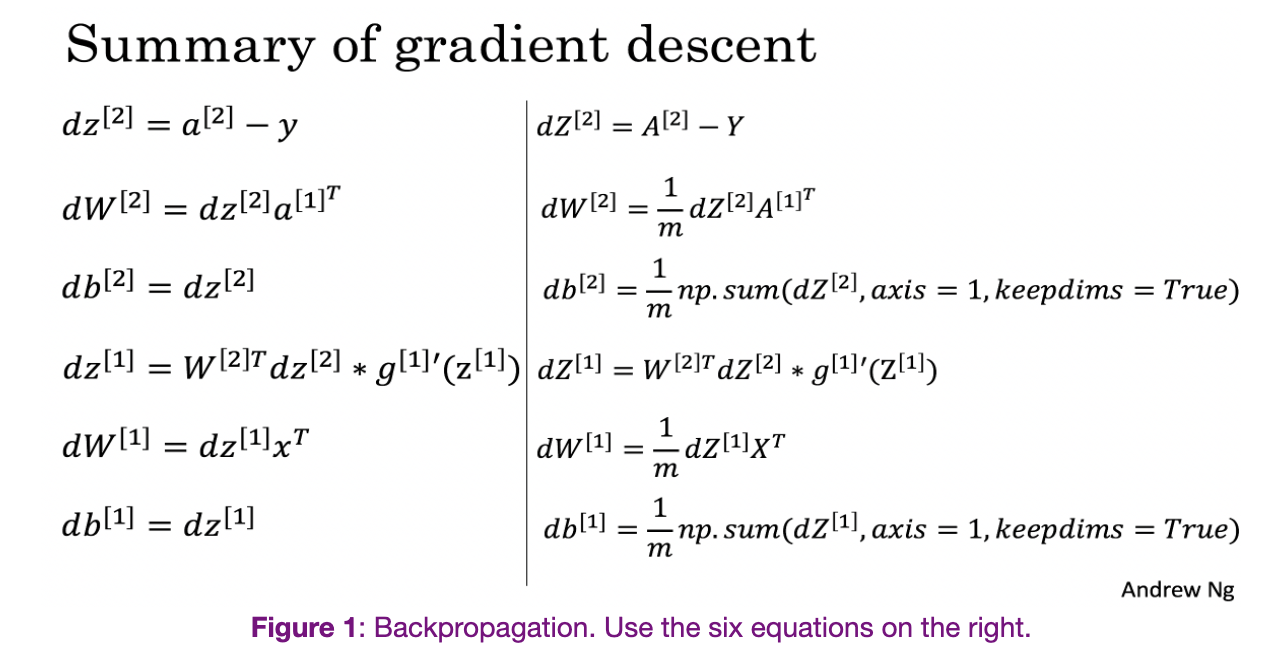

In [59]:
#5: backWord Propagation function
def backPropagation(X,Y,cash,params):
  m=X.shape[1]
  dZ2=cash['out']-Y
  dW2=np.dot(dZ2,cash['cash']['A1'].T)/m
  db2=np.sum(dZ2,axis=1,keepdims=True)/m
  dZ1=np.multiply(np.dot(params['W2'].T,dZ2),1-np.power(cash['cash']['A1'],2))
  dW1=np.dot(dZ1,X.T)/m
  db1=np.sum(dZ1,axis=1,keepdims=True)/m

  return {'dW1':dW1,'db1':db1,'dW2':dW2,'db2':db2}

In [60]:
#Test 5
backPropagation(X,Y,forwardPropagation(X,parameters(neuralNetStruct(2,4,1))),parameters(neuralNetStruct(2,4,1)))

{'dW1': array([[ 0.01990805,  0.01045022],
        [-0.00247328,  0.07893038],
        [-0.03958239, -0.0923789 ],
        [ 0.33191856, -0.0337561 ]]),
 'db1': array([[-0.00583802],
        [ 0.0073049 ],
        [-0.00028352],
        [-0.0066365 ]]),
 'dW2': array([[ 0.01781436,  0.16575347,  0.15284389, -0.09348675]]),
 'db2': array([[-0.00419253]])}

In [61]:
#6: Gradien Descent function of nn with one hiden layer
import copy
def gradientDescent(params,grads,alpha=0.01):
  W1,b1,W2,b2=copy.deepcopy(params["W1"]),copy.deepcopy(params["b1"]),copy.deepcopy(params["W2"]),copy.deepcopy(params["b2"])
  dW1,db1,dW2,db2=grads['dW1'],grads['db1'],grads['dW2'],grads['db2']
  W1-=alpha*dW1
  b1-=alpha*db1
  W2-=alpha*dW2
  b2-=alpha*db2
  params={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
  return params

In [70]:
def buildNN(X,Y,n_h,alpha=0.01,iter=100,show=False):
  params=parameters(neuralNetStruct(X.shape[0],n_h,1))
  for i in range(iter):
    forward=forwardPropagation(X,params)
    grads=backPropagation(X,Y,forward,params)
    params=gradientDescent(params,grads,0.01)
    if i%100==0 and show==True:
      print(f'iter: {i} cost={cost(Y,Y_hat=forward["out"])}')
  return params

In [71]:
#Test
buildNN(X,Y,4,1.2,100000)

{'W1': array([[-0.14042177,  1.9171462 ],
        [ 3.05090082,  3.66849871],
        [ 3.48505617, -4.51221449],
        [ 0.08675543,  5.08571822]]),
 'b1': array([[-0.47664457],
        [ 0.13595124],
        [ 0.06905635],
        [ 0.28028901]]),
 'W2': array([[ 2.52630367, -4.55065977,  4.67579587,  4.96827243]]),
 'b2': array([[0.07256059]])}

In [79]:
#Predict Function
def predict(params,X):
  out,cash=forwardPropagation(X,params).values()
  out=out>0.5
  return out

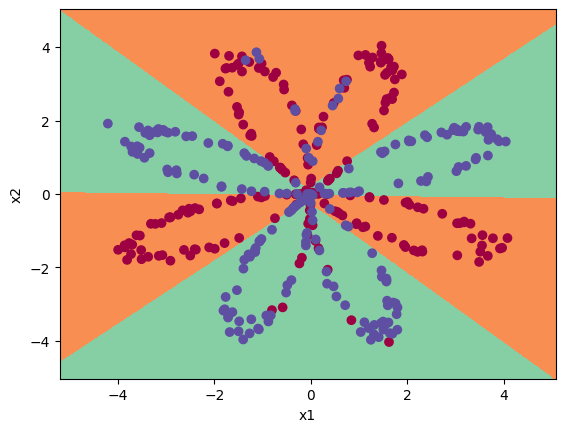

In [88]:
#Test
paramsPredict=buildNN(X,Y,4,1.2,10000)
Y_hat=predict(paramsPredict,X)
plot_decision_boundary(lambda x: predict(paramsPredict, x.T), X, Y)